In [2]:
import numpy as np
from datetime import datetime
import os
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.misc import imread

In [3]:
dict_1 = {}
dict_2 = {}
batting_team = 'Royal Challengers Bangalore'
x = glob.glob(r'C:\Users\aniru\Desktop\Season\*.csv')
l = []

In [4]:
def analysis_3 (df1,j) :
    match_id = df1.match_id.unique().tolist()
    df1 = df1.set_index(['match_id'] , drop = False)
#df2 = df1.set_index(['match_id'] ) #drop = False)
#df1['final_score'] = sum(df1['total_runs'])
    appended_data = []
    for i in match_id :
        df2 = df1[df1['match_id'] == i]
        df2 = df2[['batting_team','total_runs','winner','season','match_id']]
        df2['total_score'] = sum(df2['total_runs'])
        df2 = df2[['batting_team','total_score','winner','season','match_id']].drop_duplicates()
        appended_data.append(df2)
    df3 = pd.concat(appended_data, axis=0)
    df3 = df3[df3['total_score'] > j]
    length = len(df3.match_id.unique().tolist())
    df3 = df3[['batting_team','total_score','winner','season']]
    if length != 0 :
        df3 = df3[df3['winner'] == batting_team]
        df3 = df3.reset_index()
        df3['percentage_above_' + str(j) + '_and_won'] = round(len(df3['match_id'].unique().tolist())/length*100)
        df3 = df3[['batting_team','season','percentage_above_' + str(j) + '_and_won']].drop_duplicates().set_index(['season'])
        return df3

In [5]:
dict_1 = {}
dict_2 = {}
batting_team = 'Chennai Super Kings'
x = glob.glob(r'C:\Users\aniru\Desktop\Season\*.csv')
l = []
j = 150
for i in x :
        df = pd.read_csv(i)
        if batting_team in df.batting_team.unique().tolist() :
            df1 = df[df['batting_team'] == batting_team]
            df1 = analysis_3(df1,j)
            l.append(df1)
df4 = pd.concat(l, axis=0)
df4 = df4.reset_index(drop = False)
df4

,season,batting_team,percentage_above_150_and_won
0,2008,Chennai Super Kings,60
1,2009,Chennai Super Kings,67
2,2010,Chennai Super Kings,70
3,2011,Chennai Super Kings,80
4,2012,Chennai Super Kings,70
5,2013,Chennai Super Kings,100
6,2014,Chennai Super Kings,50
7,2015,Chennai Super Kings,45


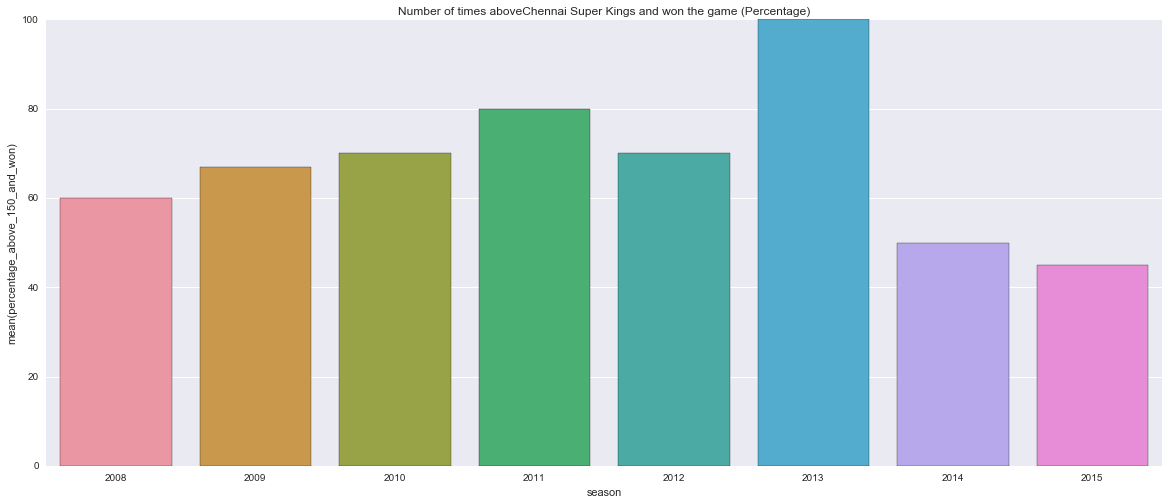

In [8]:
plt.subplots(figsize=(20,8))
ax = sns.barplot(x='season',y='percentage_above_'+str(j)+'_and_won',data=df4)
ax.set(title = 'Number of times above' + batting_team + ' and won the game (Percentage)')
plt.savefig('foo3.png')